In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-largest-companies-in-world/Europe.csv
/kaggle/input/list-of-largest-companies-in-world/United_States.csv
/kaggle/input/list-of-largest-companies-in-world/India.csv
/kaggle/input/list-of-largest-companies-in-world/Philippines.csv


# Getting Started with the “List of Largest Companies in the World” Dataset


# 1. Introduction

This notebook provides a simple, beginner-friendly introduction to the dataset.
It demonstrates how to:

Load all regional CSV files

Explore the structure and summary statistics

Visualize comparisons

Merge datasets for combined analysis

This serves as a quick-start guide for analysts, students, and researchers.

# 2. Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 3. Loading the Dataset

In [21]:
Europe = pd.read_csv("/kaggle/input/list-of-largest-companies-in-world/Europe.csv")
India = pd.read_csv("/kaggle/input/list-of-largest-companies-in-world/India.csv")
Philippines = pd.read_csv("/kaggle/input/list-of-largest-companies-in-world/Philippines.csv")
USA = pd.read_csv("/kaggle/input/list-of-largest-companies-in-world/United_States.csv")


In [22]:
Europe.shape

(100, 5)

In [23]:
Europe.head()

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
0,1,Volkswagen,Automotive,348.408,Germany
1,2,Shell,Oil and gas,323.183,United Kingdom
2,3,TotalEnergies,Oil and gas,218.945,France
3,4,Glencore,Conglomerate,217.829,Switzerland
4,5,BP,Oil and gas,213.032,United Kingdom


In [24]:
Europe.tail(5)

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
95,96,Lufthansa,Transportation,40.455,Germany
96,97,ThyssenKrupp,Conglomerate,40.027,Germany
97,98,Inditex,Retail,35.799,Spain
98,99,Schneider Electric,Electrical equipment,38.812,France
99,100,ACS Group,Engineering,38.634,Spain


In [25]:
Europe.sample(3)

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
17,18,Nestlé,Consumer goods,103.505,Switzerland
70,71,Phoenix Pharmahandel,Pharmaceuticals,50.934,Germany
79,80,Exor,Investment,48.368,Netherlands


In [26]:
Europe.describe()

,Rank,Revenue(US$ billions)
count,100.000000,100.000000
mean,50.500000,82.062070
std,29.011492,54.239724
min,1.000000,35.799000
25%,25.750000,49.783750
50%,50.500000,63.576500
75%,75.250000,93.191500
max,100.000000,348.408000


In [27]:
Europe.columns

Index(['Rank', 'Company', 'Industry', 'Revenue(US$ billions)', 'Headquarters'], dtype='object')

In [28]:
for i in Europe.columns:
    print(i, ' '  ,Europe[i].dtype)


Rank   int64
Company   object
Industry   object
Revenue(US$ billions)   float64
Headquarters   object


In [29]:
Europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   100 non-null    int64  
 1   Company                100 non-null    object 
 2   Industry               100 non-null    object 
 3   Revenue(US$ billions)  100 non-null    float64
 4   Headquarters           100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [30]:
Europe.isnull().sum()

Rank                     0
Company                  0
Industry                 0
Revenue(US$ billions)    0
Headquarters             0
dtype: int64

In [31]:
import seaborn as sns


<Axes: >

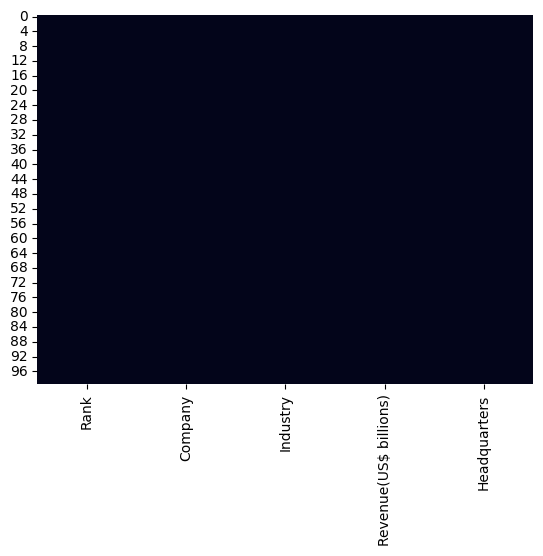

In [32]:
sns.heatmap(Europe.isnull(), cbar=False)


<Axes: >

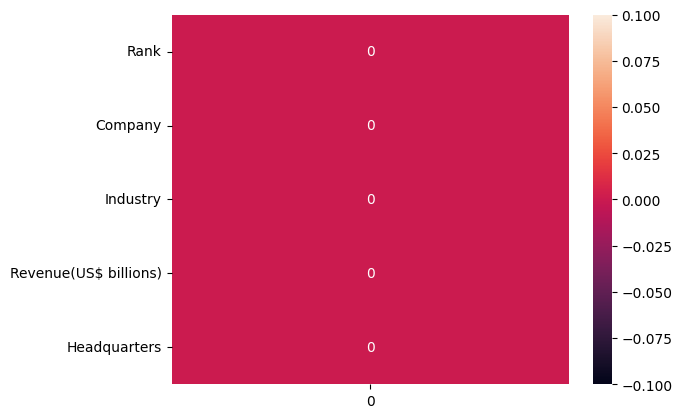

In [33]:
sns.heatmap(Europe.isnull().sum().to_frame(), annot=True)


In [34]:
Europe

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
0,1,Volkswagen,Automotive,348.408,Germany
1,2,Shell,Oil and gas,323.183,United Kingdom
2,3,TotalEnergies,Oil and gas,218.945,France
3,4,Glencore,Conglomerate,217.829,Switzerland
4,5,BP,Oil and gas,213.032,United Kingdom
...,...,...,...,...,...
95,96,Lufthansa,Transportation,40.455,Germany
96,97,ThyssenKrupp,Conglomerate,40.027,Germany
97,98,Inditex,Retail,35.799,Spain
98,99,Schneider Electric,Electrical equipment,38.812,France


In [35]:
Europe['Rank']

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Rank, Length: 100, dtype: int64

In [36]:
Europe['Rank'].value_counts()

Rank
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64

In [37]:
Europe['Company']

0             Volkswagen
1                  Shell
2          TotalEnergies
3               Glencore
4                     BP
             ...        
95             Lufthansa
96          ThyssenKrupp
97               Inditex
98    Schneider Electric
99             ACS Group
Name: Company, Length: 100, dtype: object

In [38]:
Europe['Company'].unique()

array(['Volkswagen', 'Shell', 'TotalEnergies', 'Glencore', 'BP',
       'Stellantis', 'BMW', 'Mercedes-Benz Group',
       'Électricité de France', 'Banco Santander', 'BNP Paribas', 'HSBC',
       'Deutsche Telekom', 'Uniper', 'Allianz', 'Rosneft', 'Equinor',
       'Nestlé', 'Enel', 'Eni', 'E.ON', 'Gazprom', 'SocGen', 'Bosch',
       'Ahold Delhaize', 'Crédit Agricole', 'Dior', 'Carrefour',
       'Rewe Group', 'Axa', 'Engie', 'Orlen', 'DHL', 'Tesco', 'Siemens',
       'Vinci', 'Lukoil', 'BASF', 'Groupe BPCE', 'UBS Group', 'Airbus',
       'ArcelorMittal', 'Koç Holding', 'Roche', 'BBVA',
       'Lloyds Banking Group', 'Deutsche Bank', 'Accenture', 'Unilever',
       'Barclays', 'Munich Re', 'Sberbank', 'Zurich Insurance Group',
       'Bouygues', 'Daimler Truck', 'ING', 'AB InBev',
       'Assicurazioni Generali', 'Repsol', 'Renault', 'Edeka', 'Novartis',
       'Rio Tinto', 'Iberdrola', 'Deutsche Bahn', 'Volvo',
       'Intesa Sanpaolo', 'Saint-Gobain', 'Bayer', 'Maersk',
       'Pho

In [39]:
Europe['Company'].value_counts()

Company
Crédit Agricole          2
Iberdrola                1
Sanofi                   1
ZF Friedrichshafen       1
Louis Dreyfus Company    1
                        ..
Orlen                    1
Engie                    1
Axa                      1
Rewe Group               1
ACS Group                1
Name: count, Length: 99, dtype: int64

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


(-0.5, 1999.5, 999.5, -0.5)

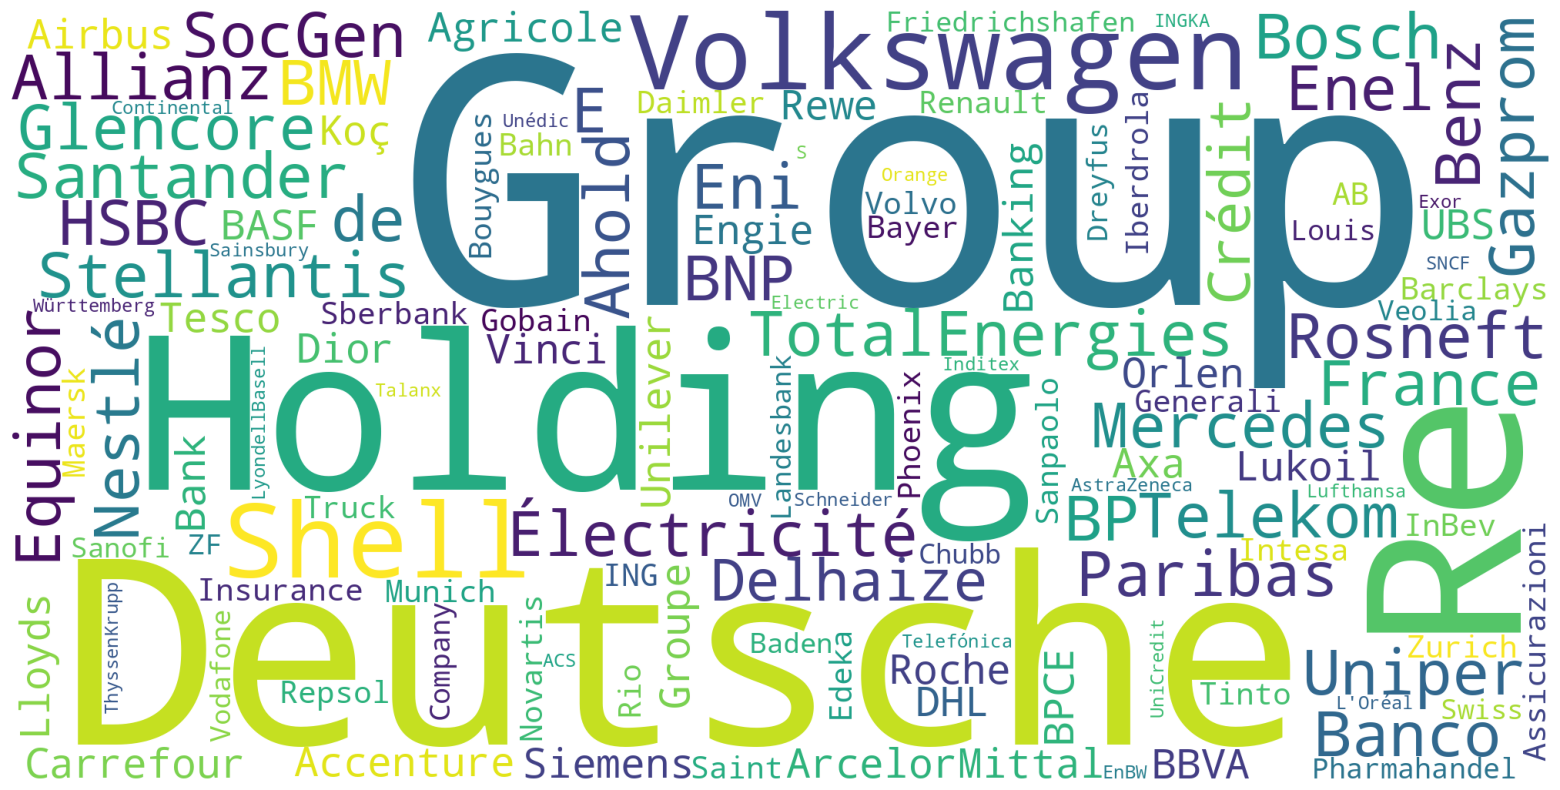

In [41]:
companies = ['Volkswagen', 'Shell', 'TotalEnergies', 'Glencore', 'BP',
       'Stellantis', 'BMW', 'Mercedes-Benz Group',
       'Électricité de France', 'Banco Santander', 'BNP Paribas', 'HSBC',
       'Deutsche Telekom', 'Uniper', 'Allianz', 'Rosneft', 'Equinor',
       'Nestlé', 'Enel', 'Eni', 'E.ON', 'Gazprom', 'SocGen', 'Bosch',
       'Ahold Delhaize', 'Crédit Agricole', 'Dior', 'Carrefour',
       'Rewe Group', 'Axa', 'Engie', 'Orlen', 'DHL', 'Tesco', 'Siemens',
       'Vinci', 'Lukoil', 'BASF', 'Groupe BPCE', 'UBS Group', 'Airbus',
       'ArcelorMittal', 'Koç Holding', 'Roche', 'BBVA',
       'Lloyds Banking Group', 'Deutsche Bank', 'Accenture', 'Unilever',
       'Barclays', 'Munich Re', 'Sberbank', 'Zurich Insurance Group',
       'Bouygues', 'Daimler Truck', 'ING', 'AB InBev',
       'Assicurazioni Generali', 'Repsol', 'Renault', 'Edeka', 'Novartis',
       'Rio Tinto', 'Iberdrola', 'Deutsche Bahn', 'Volvo',
       'Intesa Sanpaolo', 'Saint-Gobain', 'Bayer', 'Maersk',
       'Phoenix Pharmahandel', 'Louis Dreyfus Company',
       'ZF Friedrichshafen', 'Sanofi', 'Swiss Re', 'Chubb', 'Veolia',
       'Vodafone', 'Landesbank Baden-Württemberg', 'Exor', 'Unédic',
       'UniCredit', 'EnBW', 'Orange S.A.', 'INGKA Holding', 'Talanx',
       'AstraZeneca', 'SNCF', 'Continental', "L'Oréal", 'Telefónica',
       'OMV', 'LyondellBasell', "Sainsbury's", 'Lufthansa',
       'ThyssenKrupp', 'Inditex', 'Schneider Electric', 'ACS Group']

text = " ".join(companies)

wc = WordCloud(width=2000, height=1000, background_color='white').generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

In [42]:
Europe['Industry']

0               Automotive
1              Oil and gas
2              Oil and gas
3             Conglomerate
4              Oil and gas
              ...         
95          Transportation
96            Conglomerate
97                  Retail
98    Electrical equipment
99             Engineering
Name: Industry, Length: 100, dtype: object

In [43]:
Europe['Industry'].unique()

array(['Automotive', 'Oil and gas', 'Conglomerate', 'Electric utility',
       'Financial services', 'Telecommunications', 'Consumer goods',
       'Retail', 'Luxury goods', 'Insurance', 'Courier', 'Construction',
       'Chemicals', 'Aeronautics and defence', 'Steel', 'Pharmaceuticals',
       'Consulting', 'Beverages', 'Energy production', 'Mining',
       'Transport', 'Heavy equipment', 'Building materials',
       'Agricultural Commodities', 'Auto and truck parts',
       'Environmental services', 'Investment', 'Cosmetics',
       'Transportation', 'Electrical equipment', 'Engineering'],
      dtype=object)

(-0.5, 1999.5, 999.5, -0.5)

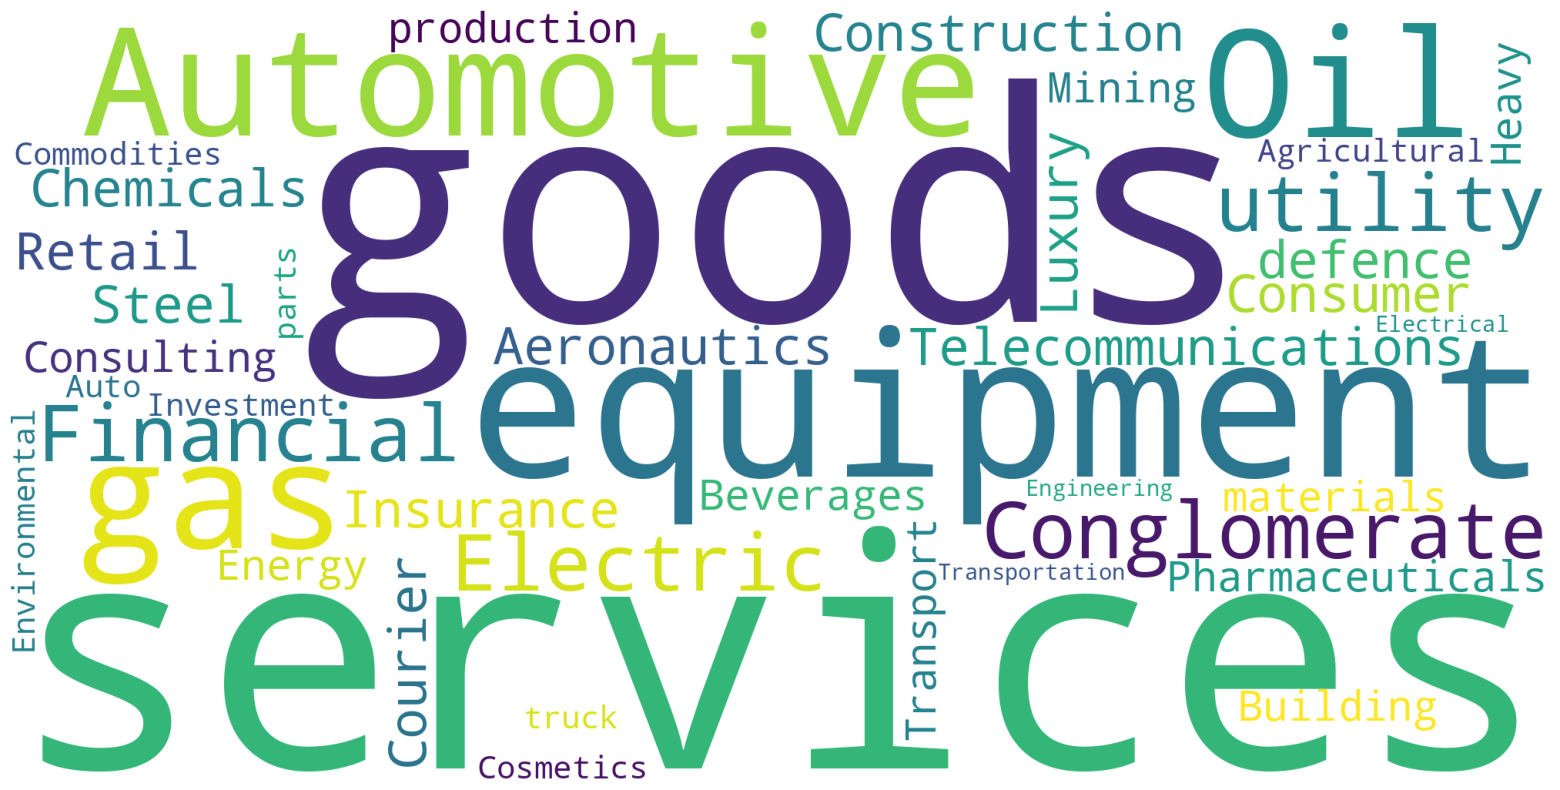

In [44]:
companies = ['Automotive', 'Oil and gas', 'Conglomerate', 'Electric utility',
       'Financial services', 'Telecommunications', 'Consumer goods',
       'Retail', 'Luxury goods', 'Insurance', 'Courier', 'Construction',
       'Chemicals', 'Aeronautics and defence', 'Steel', 'Pharmaceuticals',
       'Consulting', 'Beverages', 'Energy production', 'Mining',
       'Transport', 'Heavy equipment', 'Building materials',
       'Agricultural Commodities', 'Auto and truck parts',
       'Environmental services', 'Investment', 'Cosmetics',
       'Transportation', 'Electrical equipment', 'Engineering']

text = " ".join(companies)

wc = WordCloud(width=2000, height=1000, background_color='white').generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

In [45]:
Europe['Industry'].value_counts()

Industry
Financial services          25
Oil and gas                 10
Retail                       7
Conglomerate                 7
Automotive                   6
Pharmaceuticals              6
Electric utility             6
Telecommunications           4
Auto and truck parts         3
Consumer goods               2
Insurance                    2
Chemicals                    2
Transport                    2
Heavy equipment              1
Electrical equipment         1
Transportation               1
Cosmetics                    1
Investment                   1
Environmental services       1
Agricultural Commodities     1
Building materials           1
Energy production            1
Mining                       1
Beverages                    1
Consulting                   1
Steel                        1
Aeronautics and defence      1
Construction                 1
Courier                      1
Luxury goods                 1
Engineering                  1
Name: count, dtype: int64

<Axes: xlabel='Industry'>

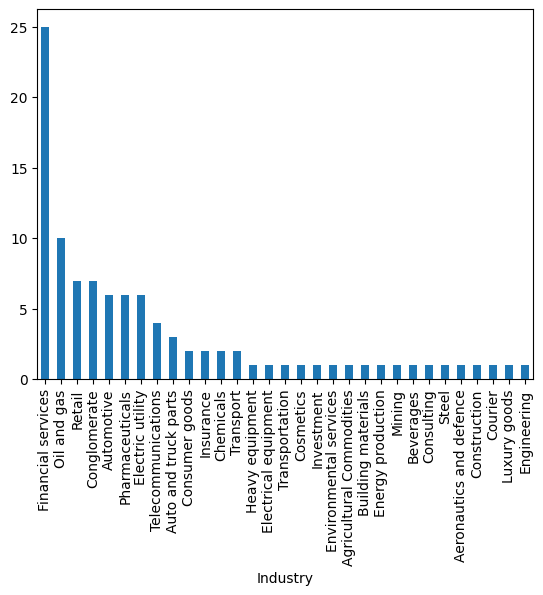

In [46]:
Europe['Industry'].value_counts().plot(kind = 'bar')

In [47]:
#using seaborn 

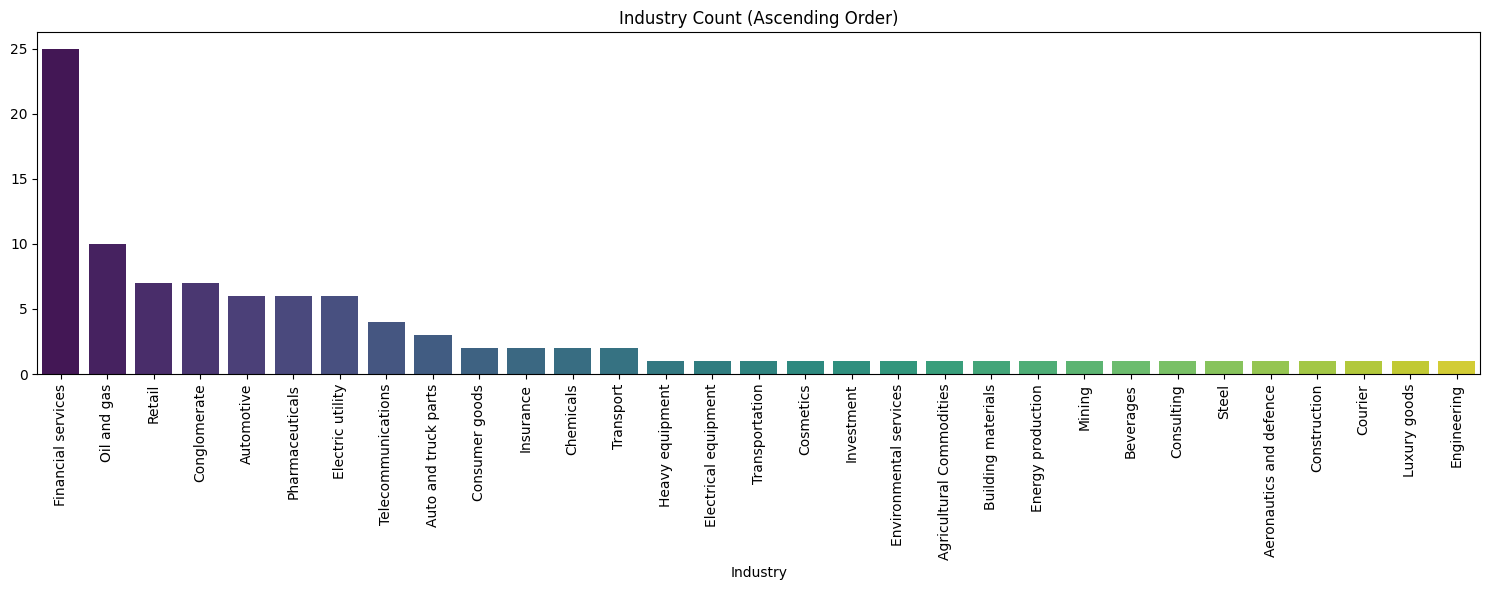

In [48]:
industry_counts = Europe['Industry'].value_counts(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Industry Count (Ascending Order)")
plt.tight_layout()
plt.show()


In [49]:
Europe['Headquarters']

0            Germany
1     United Kingdom
2             France
3        Switzerland
4     United Kingdom
           ...      
95           Germany
96           Germany
97             Spain
98            France
99             Spain
Name: Headquarters, Length: 100, dtype: object

In [50]:
Europe['Headquarters'].unique()

array(['Germany', 'United Kingdom', 'France', 'Switzerland',
       'Netherlands', 'Spain', 'Russia', 'Norway', 'Italy', 'Poland',
       'Luxembourg', 'Turkey', 'Ireland', 'Belgium', 'Sweden', 'Denmark',
       'Austria'], dtype=object)

In [51]:
Europe['Headquarters'].value_counts()

Headquarters
Germany           26
France            23
United Kingdom    11
Switzerland        8
Netherlands        7
Spain              7
Italy              5
Russia             4
Norway             1
Poland             1
Luxembourg         1
Turkey             1
Ireland            1
Belgium            1
Sweden             1
Denmark            1
Austria            1
Name: count, dtype: int64

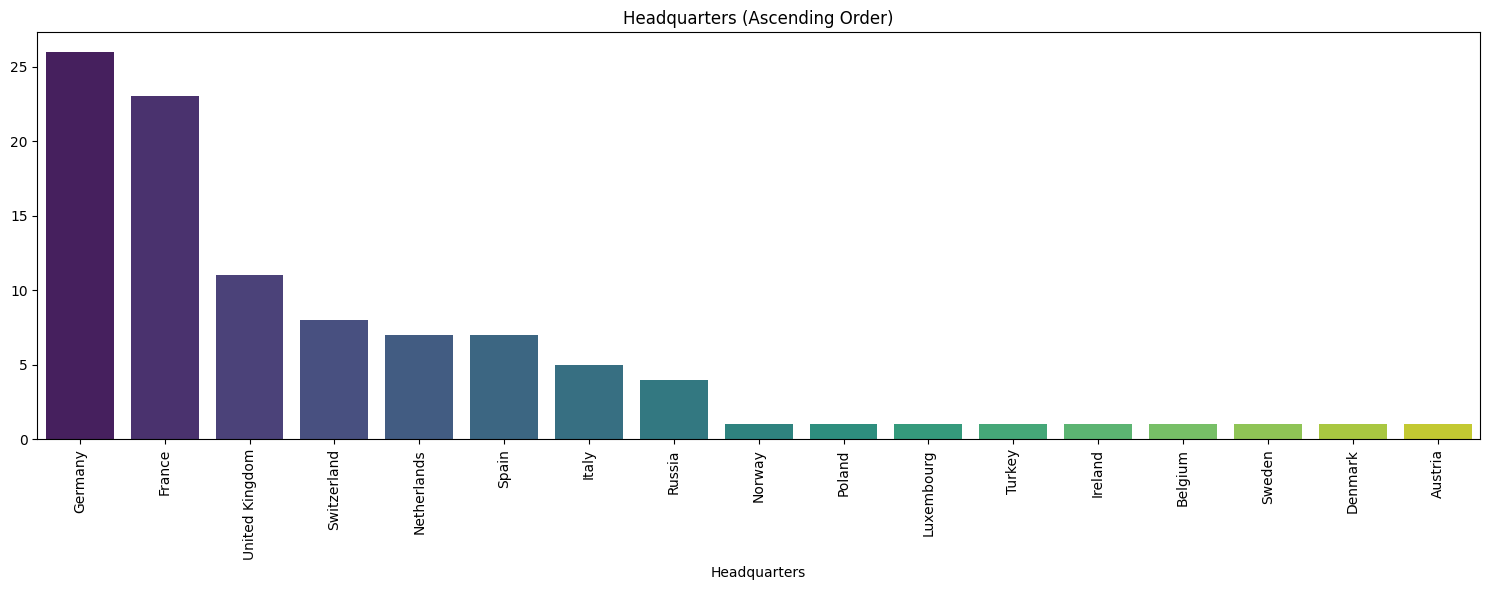

In [52]:
industry_counts = Europe['Headquarters'].value_counts(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Headquarters (Ascending Order)")
plt.tight_layout()
plt.show()


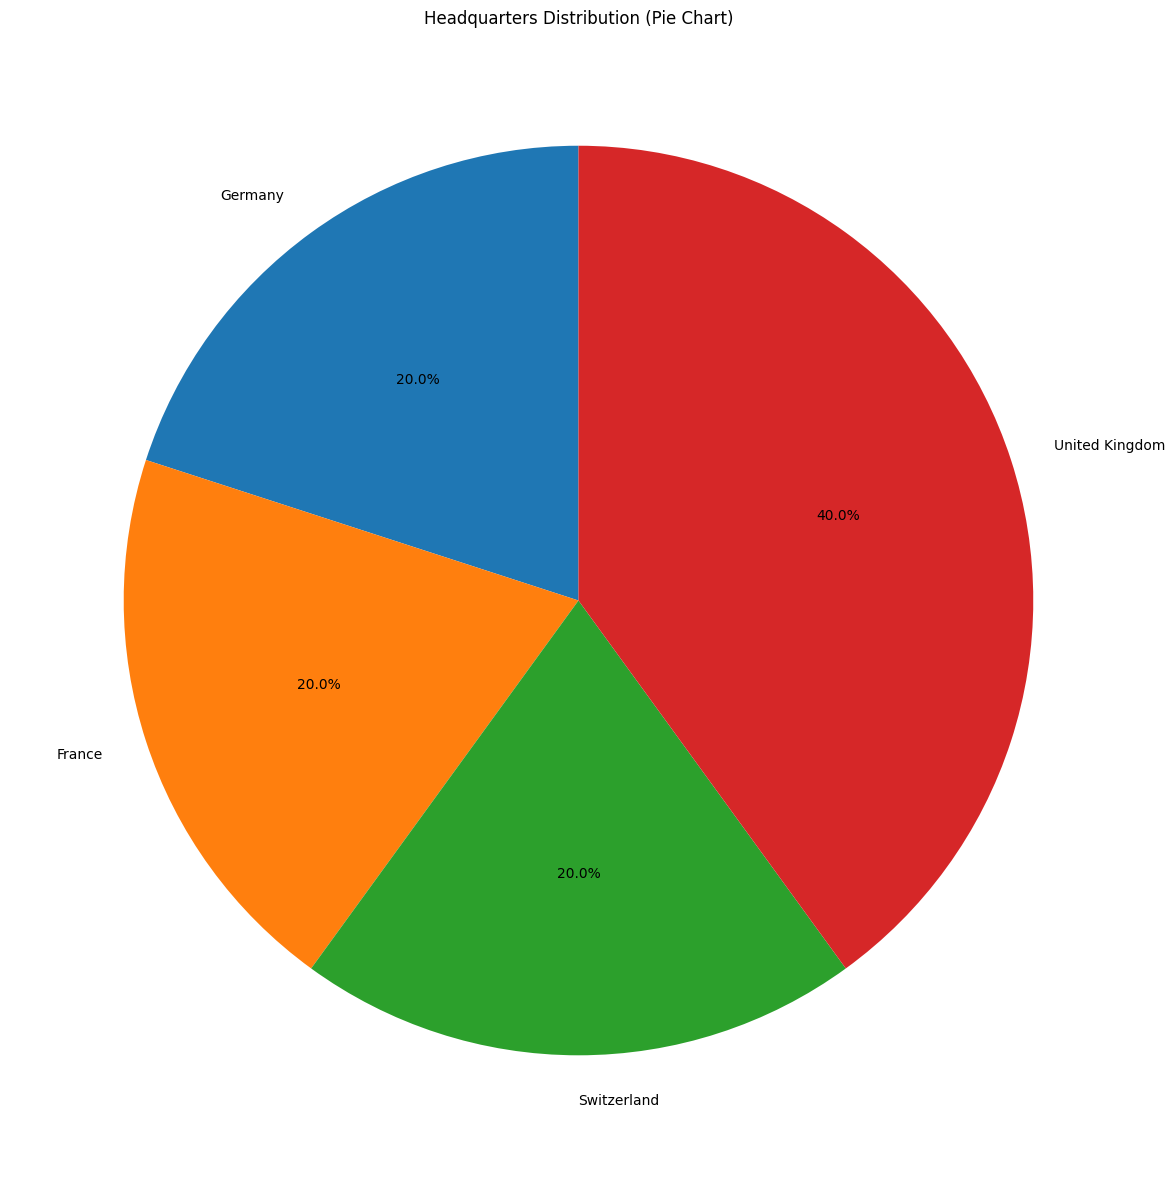

In [53]:
import matplotlib.pyplot as plt

headquarters_counts = Europe['Headquarters'][:5].value_counts(ascending=True)

plt.figure(figsize=(12,12))
plt.pie(headquarters_counts,
        labels=headquarters_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Headquarters Distribution (Pie Chart)")
plt.tight_layout()
plt.show()


In [54]:
India.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,49,Reliance Industries Limited,Mumbai,108.8,8.4,210.5,233.1,Conglomerate
1,2,55,State Bank of India,Mumbai,71.8,8.1,807.4,87.6,Banking
2,3,65,HDFC Bank,Mumbai,49.3,7.7,483.2,133.6,Banking
3,4,70,Life Insurance Corporation,New Delhi,98.0,4.9,561.4,73.6,Insurance
4,5,142,ICICI Bank,Mumbai,28.5,5.3,283.5,95.3,Banking


In [55]:
USA.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"680,985",5.1%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"637,959",11.0%,"1,556,000","Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,"400,278",7.7%,"400,000","Minnetonka, Minnesota"
3,4,Apple,Electronics industry,"391,035",2.0%,"164,000","Cupertino, California"
4,5,CVS Health,Healthcare,"372,809",4.2%,"259,500","Woonsocket, Rhode Island"


In [56]:
Philippines.head()

,Rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters
0,1,San Miguel Corporation,Conglomerate,"26,024",4,"53,184",Mandaluyong
1,2,SM Investments,Conglomerate,"10,277","1,385","72,770",Pasay
2,3,Manila Electric,Utilities,"7,980",684,"14,494",Pasig
3,4,JG Summit Holdings,Conglomerate,"5,932",361,"25,979",Pasig
4,5,Banco de Oro,Banking,"5,832","1,321","41,647",Mandaluyong


# 5. Basic Data Overview

## Shape & Columns

In [57]:
for name, df in [("Europe", Europe), ("India", India), ("Philippines", Philippines), ("USA", USA)]:
    print(f"{name}: {df.shape}")
    print(df.columns)
    print("-"*50)

Europe: (100, 5)
Index(['Rank', 'Company', 'Industry', 'Revenue(US$ billions)', 'Headquarters'], dtype='object')
--------------------------------------------------
India: (71, 9)
Index(['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters',
       'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)',
       'Value(billions US$)', 'Industry'],
      dtype='object')
--------------------------------------------------
Philippines: (25, 7)
Index(['Rank', 'Name', 'Industry', 'Revenue(USD millions)',
       'Profits(USD millions)', 'Employees', 'Headquarters'],
      dtype='object')
--------------------------------------------------
USA: (100, 7)
Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')
--------------------------------------------------


## Missing Values

In [58]:
Europe.isnull().sum()

Rank                     0
Company                  0
Industry                 0
Revenue(US$ billions)    0
Headquarters             0
dtype: int64

In [59]:
India.isnull().sum()

Rank                     0
Forbes 2000 rank         0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profit(billions US$)     0
Assets(billions US$)     0
Value(billions US$)      0
Industry                 0
dtype: int64

In [60]:
USA.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [61]:
Philippines.isna().sum()

Rank                     0
Name                     0
Industry                 0
Revenue(USD millions)    0
Profits(USD millions)    0
Employees                0
Headquarters             0
dtype: int64

# 6. Summary Statistics

In [62]:
Europe.describe()

,Rank,Revenue(US$ billions)
count,100.000000,100.000000
mean,50.500000,82.062070
std,29.011492,54.239724
min,1.000000,35.799000
25%,25.750000,49.783750
50%,50.500000,63.576500
75%,75.250000,93.191500
max,100.000000,348.408000


In [63]:
India.describe()

,Rank,Forbes 2000 rank,Revenue(billions US$),Assets(billions US$),Value(billions US$)
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.408451,1048.267606,17.812676,71.621127,33.588732
std,19.920971,608.968729,23.347499,132.730041,37.901853
min,1.000000,49.000000,0.200000,1.300000,1.100000
25%,18.500000,535.000000,4.150000,10.550000,12.000000
50%,36.000000,947.000000,10.800000,27.400000,23.600000
75%,51.500000,1695.000000,17.750000,58.200000,39.000000
max,69.000000,1980.000000,108.800000,807.400000,233.100000


In [64]:
USA.describe()

,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [65]:
Philippines.describe()

,Rank
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


# 7. Simple Data Visualization

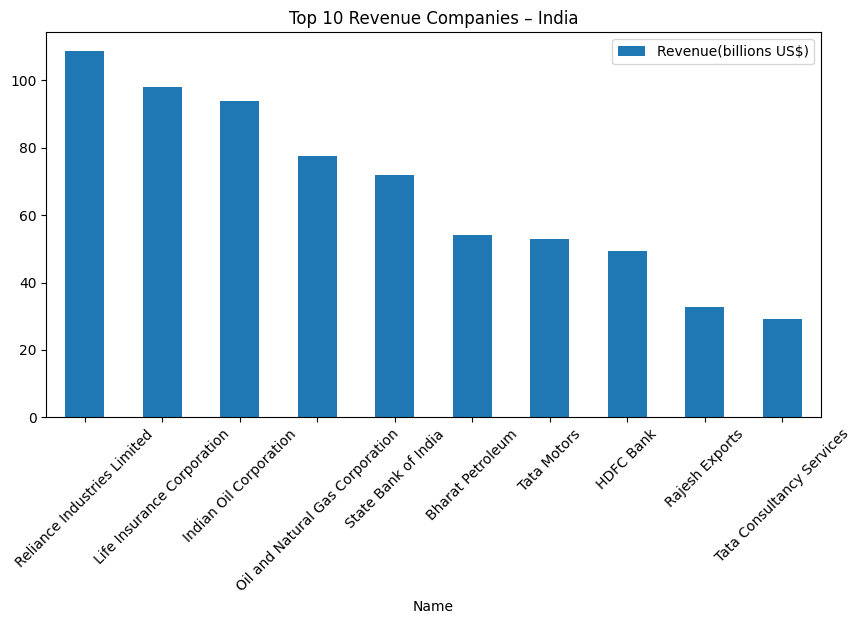

In [66]:
India.nlargest(10, "Revenue(billions US$)").plot(
    x="Name",
    y="Revenue(billions US$)",
    kind="bar",
    figsize=(10,5)
)
plt.title("Top 10 Revenue Companies – India")
plt.xticks(rotation=45)
plt.show()


In [67]:
Europe.head()

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
0,1,Volkswagen,Automotive,348.408,Germany
1,2,Shell,Oil and gas,323.183,United Kingdom
2,3,TotalEnergies,Oil and gas,218.945,France
3,4,Glencore,Conglomerate,217.829,Switzerland
4,5,BP,Oil and gas,213.032,United Kingdom


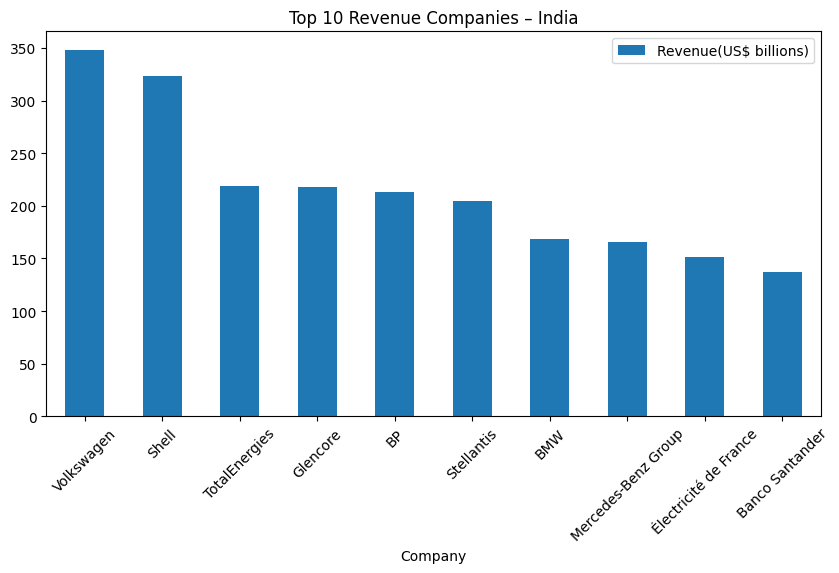

In [68]:
Europe.nlargest(10, "Revenue(US$ billions)").plot(
    x="Company",
    y="Revenue(US$ billions)",
    kind="bar",
    figsize=(10,5)
)
plt.title("Top 10 Revenue Companies – India")
plt.xticks(rotation=45)
plt.show()
